In [17]:
# Forecasting Sales Using a Neural Network

# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras  # single import

# 2. Generate Synthetic Historical Sales Data

np.random.seed(42)
n = 1000  # number of days

past_sales = np.random.randint(200, 2000, n)           # past day sales
promotion = np.random.choice([0,1], n, p=[0.7,0.3])    # 30% days have promotion
season = np.random.choice([1,2,3,4], n)                # 1=spring, 2=summer, 3=autumn, 4=winter

# Simulate future sales
future_sales = past_sales * (1 + 0.1*promotion) * (1 + 0.05*np.sin(season*np.pi/2))
future_sales += np.random.normal(0, 50, n)  # add noise

# Create DataFrame
df = pd.DataFrame({
    "PastSales": past_sales,
    "Promotion": promotion,
    "Season": season,
    "FutureSales": future_sales
})

print("First 10 rows of synthetic sales data:")
df.head(10)


First 10 rows of synthetic sales data:


,PastSales,Promotion,Season,FutureSales
0,1326,0,2,1290.548314
1,1659,1,3,1708.133197
2,1060,0,4,1118.096691
3,1494,0,2,1455.581753
4,1330,1,1,1463.843598
5,1295,0,3,1234.999688
6,1924,0,2,1905.976330
7,1244,1,1,1462.390775
8,1838,1,3,1936.583597
9,321,0,1,335.454075


In [18]:
# 3. Preprocess Data

X = df[["PastSales","Promotion","Season"]].values
y = df["FutureSales"].values.reshape(-1,1)

# Scale features and target
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [19]:
# 4. Build Neural Network

model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),  # define input shape properly
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)  # output layer
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='mse',
    metrics=['mae']
)


In [20]:
# 5. Train Model

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0186 - mae: 0.0915 - val_loss: 0.0018 - val_mae: 0.0325
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - mae: 0.0331 - val_loss: 0.0011 - val_mae: 0.0258
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.5864e-04 - mae: 0.0236 - val_loss: 7.8406e-04 - val_mae: 0.0219
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.9227e-04 - mae: 0.0212 - val_loss: 7.5647e-04 - val_mae: 0.0215
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.1961e-04 - mae: 0.0214 - val_loss: 7.6890e-04 - val_mae: 0.0215
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.4912e-04 - mae: 0.0203 - val_loss: 7.8604e-04 - val_mae: 0.0219
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.2306e-04 - mae: 0.0211 - val_loss: 7.1470e-04 - val_mae: 0.0206
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.6391e-04 - mae: 0.0207 - val_loss: 8.2782e-04 - val_mae: 0.0229
Epoch 9/50
20/20 ━━━━━━

In [21]:
# 6. Evaluate Model

loss, mae = model.evaluate(X_test, y_test)
print("\nTest MAE:", mae)

# Predict and inverse scale
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.7071e-04 - mae: 0.0216  

Test MAE: 0.021593542769551277
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


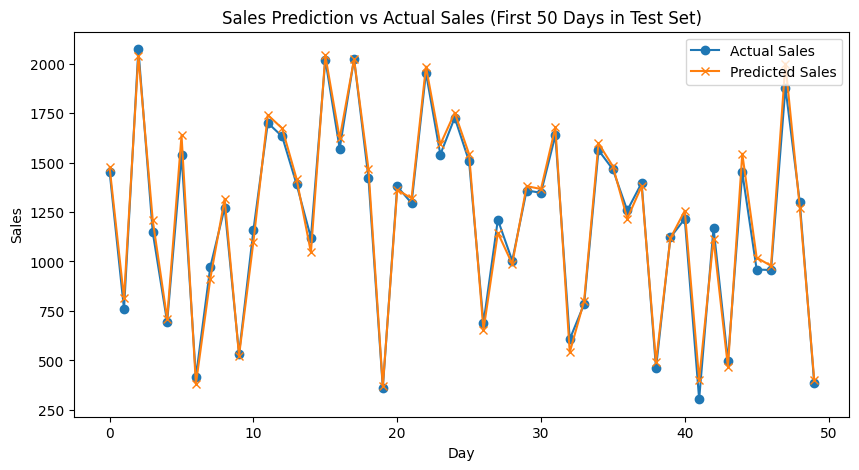

In [22]:
# 7. Plot Predictions vs True Sales

plt.figure(figsize=(10,5))
plt.plot(y_true[:50], label='Actual Sales', marker='o')
plt.plot(y_pred[:50], label='Predicted Sales', marker='x')
plt.title("Sales Prediction vs Actual Sales (First 50 Days in Test Set)")
plt.xlabel("Day")
plt.ylabel("Sales")
plt.legend()
plt.show()